# Arbol de Calibracion - Tree

Notebook para calcular y visualizar constantes de calibracion de RTDs usando la clase `Tree`.

## Flujo
1. Cargar datos (Logfile + config.yml)
2. Procesar Sets
3. Construir arbol de calibracion
4. Calcular offsets globales
5. Visualizar resultados

In [1]:
import sys
import os
from pathlib import Path

# Agregar src al path
project_root = Path.cwd().parent.parent
sys.path.insert(0, str(project_root / "RTD_Calibration" / "src"))

print(f"Project root: {project_root}")

from logfile import Logfile
from set import Set
from tree import Tree
import pandas as pd
import yaml

Project root: /Users/vicky/Desktop/rtd-calib-simple


## 1. Cargar datos

In [2]:
# Cargar Logfile
logfile_path = project_root / "RTD_Calibration" / "data" / "LogFile.csv"
logfile = Logfile(str(logfile_path))
print(f"Logfile cargado: {len(logfile.log_file)} registros")

# Cargar configuracion
config_path = project_root / "RTD_Calibration" / "config" / "config.yml"
with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

print(f"Configuracion cargada: {len(config['sensors']['sets'])} sets configurados")

CSV file loaded successfully from '/Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/data/LogFile.csv'.
Logfile cargado: 832 registros
Configuracion cargada: 59 sets configurados


## 2. Procesar Sets

La clase `Set` agrupa runs por CalibSetNumber y calcula constantes de calibracion promediando los offsets de todos los runs de cada set.

In [3]:
# Crear handler de Sets
set_handler = Set()

# Obtener lista de sets desde config
set_ids = list(config['sensors']['sets'].keys())
print(f"Procesando {len(set_ids)} sets...")

# Agrupar runs y calcular constantes
set_handler.group_runs(set_ids)
set_handler.calculate_calibration_constants(set_ids)

# Crear diccionario para Tree
sets_dict = {}
for set_id in set_ids:
    if set_id in set_handler.calibration_constants:
        # Crear objeto simple con la estructura que Tree espera
        class SetData:
            def __init__(self, constants, errors):
                self.calibration_constants = constants
                self.calibration_errors = errors
                
        sets_dict[float(set_id)] = SetData(
            set_handler.calibration_constants[set_id],
            set_handler.calibration_errors[set_id]
        )

print(f"\nTotal sets procesados: {len(sets_dict)}")

# Mostrar resumen
summary = set_handler.get_summary()
print("\nResumen por Set:")
print(summary.head(10))

CSV file loaded successfully from '/Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/data/LogFile.csv'.
Procesando 59 sets...

=== Agrupando runs por CalibSetNumber ===
Sets a procesar: [np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(13.0), np.float64(14.0), np.float64(15.0), np.float64(16.0), np.float64(17.0), np.float64(18.0), np.float64(19.0), np.float64(20.0), np.float64(21.0), np.float64(22.0), np.float64(23.0), np.float64(24.0), np.float64(25.0), np.float64(26.0), np.float64(27.0), np.float64(28.0), np.float64(29.0), np.float64(30.0), np.float64(31.0), np.float64(32.0), np.float64(33.0), np.float64(34.0), np.float64(35.0), np.float64(36.0), np.float64(37.0), np.float64(38.0), np.float64(39.0), np.float64(40.0), np.float64(41.0), np.float64(42.0), np.float64(43.0), np.float64(44.0), np.float64(45.0), np.float64(46.0), np.float64(47.0), np.float64(48.0), np.flo

/Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/src/run.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["datetime"] = pd.to_datetime(
/Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/src/run.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["datetime"] = pd.to_datetime(
/Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/src/run.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["datetime"] = pd.to_datetime(
/Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/src/run.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass 

Cargando: /Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/data/temperature_files/RTD_Calibs/CalSetN_8/20220701_ln2_r48421_r48177_48840-48851_3.txt
  Datos cargados: 883 registros
  Sensores asociados: 14
  Incluido: 20220701_ln2_r48421_r48177_48840-48851_3
  Excluido (keywords): 20220701_ln2_r48421_r48177_48840-48851_4_pre
Cargando: /Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/data/temperature_files/RTD_Calibs/CalSetN_8/20220701_ln2_r48421_r48177_48840-48851_4.txt
  Datos cargados: 5231 registros
  Sensores asociados: 14
  Incluido: 20220701_ln2_r48421_r48177_48840-48851_4
  Total runs válidos: 4

Procesando Set 9.0
  Excluido (keywords): 20221910_ln2_r48421_r48422_48852-48863_1_pre
Cargando: /Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/data/temperature_files/RTD_Calibs/CalSetN_9/20221910_ln2_r48421_r48422_48852-48863_1.txt
  Datos cargados: 666 registros
  Sensores asociados: 14
  Incluido: 20221910_ln2_r48421_r48422_48852-48863_1
  Excluido (keywords): 2022191

/Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/src/run.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["datetime"] = pd.to_datetime(
/Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/src/run.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["datetime"] = pd.to_datetime(
/Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/src/run.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["datetime"] = pd.to_datetime(
/Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/src/run.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass 

  Datos cargados: 7233 registros
  Sensores asociados: 14
  Incluido: 20240628_ln2_r49215_r48422_48900-48911_4
  Total runs válidos: 4

Procesando Set 14.0
  Excluido (keywords): 20240627_ln2_r49215_r48422_48912-48963_1_pre
Cargando: /Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/data/temperature_files/RTD_Calibs/CalSetN_14/20240627_ln2_r49215_r48422_48912-48963_1.txt
  Datos cargados: 865 registros
  Sensores asociados: 14
  Incluido: 20240627_ln2_r49215_r48422_48912-48963_1
  Excluido (keywords): 20240627_ln2_r49215_r48422_48912-48963_2_pre
Cargando: /Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/data/temperature_files/RTD_Calibs/CalSetN_14/20240627_ln2_r49215_r48422_48912-48963_2.txt
  Datos cargados: 680 registros
  Sensores asociados: 14
  Incluido: 20240627_ln2_r49215_r48422_48912-48963_2
  Excluido (keywords): 20240627_ln2_r49215_r48422_48912-48963_3_pre
Cargando: /Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/data/temperature_files/RTD_Calibs/CalSetN_14/202

## 3. Construir arbol de calibracion

Crear el arbol que conecta sets de diferentes rondas usando sensores raised.

In [4]:
tree = Tree(sets_dict, str(config_path))
tree.print_tree_structure()


✓ Estructura del árbol cargada desde tree.yaml

Sets clasificados por ronda:
  Ronda 1: 47 sets -> [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 59.0, 60.0]
  Ronda 2: 7 sets -> [49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0]
  Ronda 3: 1 sets -> [57.0]

ESTRUCTURA DEL ARBOL DE CALIBRACION

RONDA 3 (1 sets)
----------------------------------------------------------------------
  Set 57: 12 sensores

RONDA 2 (7 sets)
----------------------------------------------------------------------
  Set 49: 12 sensores | 2 raised: [48484, 48747]
  Set 50: 12 sensores | 2 raised: [48869, 48956]
  Set 51: 12 sensores | 2 raised: [49112, 49167]
  Set 52: 12 sensores | 2 raised: [49233, 55073]
  Set 53: 12 sensores | 2 raised: [55253, 55227]
  Set 54: 12 sensores | 2 raised: [55233, 55221]
 

## 4. Calcular offsets globales

Calcular offsets de sensores de R1 respecto a la referencia absoluta en R3 (Set 57).

El algoritmo encadena offsets:
- **Paso 1**: Sensor → Raised (dentro del mismo set R1)
- **Paso 2**: Raised_R1 → Raised_R2 (en set R2 correspondiente)
- **Paso 3**: Raised_R2 → Referencia (en Set 57, R3)

El error se propaga como raíz de la suma de cuadrados.

In [5]:
# Recargar módulo tree para aplicar cambios
import importlib
import sys
tree_module = sys.modules.get('tree')
if tree_module:
    importlib.reload(tree_module)
    from tree import Tree
    tree = Tree(sets_dict, str(config_path))
    print("Módulo tree recargado\n")

# Calcular offsets para sets R1 (3-39) relacionados con Set 57 (R3)
# Estos sets tienen conexión completa a través de sets R2 (49-54)
# Sets 40-48 no están incluidos en este rango (procesarán con otra referencia)
print("=== CALCULANDO SETS R1 (3-39) → R3 (57) ===\n")
global_constants = tree.calculate_all_offsets(r1_sets_range=(3, 39))
print(f"\nConstantes globales calculadas: {len(global_constants)} filas")


✓ Estructura del árbol cargada desde tree.yaml

Sets clasificados por ronda:
  Ronda 1: 47 sets -> [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 59.0, 60.0]
  Ronda 2: 7 sets -> [49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0]
  Ronda 3: 1 sets -> [57.0]
Módulo tree recargado

=== CALCULANDO SETS R1 (3-39) → R3 (57) ===


Calculando offsets respecto a Set 57.0 (Ronda 3)
  Modo manual: Limitando a sets R1 del 3 al 39
  Referencia absoluta: Sensor 48484
  Procesando 36 sets de Ronda 1

=== RESULTADOS ===
Total sensores R1 procesados: 432
Calculados exitosamente: 376
Sensores descartados: 56
Sin conexión: 0

Estadísticas de offsets:
  Promedio: 0.2597 K
  Desv. Std: 0.6343 K
  Min: -0.2623 K
  Max: 11.5468 K

Estadísticas de errores:
  Promedio: 0.27975 K
  Max: 62.76392 K

Const

In [6]:
# Análisis de resultados
print("\n=== Análisis de resultados ===")
print(f"Total filas en CSV: {len(global_constants)}")
print(f"\nDistribución por Status:")
print(global_constants['Status'].value_counts())

# Estadísticas de sensores calculados
calculated = global_constants[global_constants['Status'] == 'Calculado']
if len(calculated) > 0:
    print(f"\n=== Sensores Calculados ===")
    print(f"Total: {len(calculated)}")
    print(f"Constante promedio: {calculated['Constante_Calibracion_K'].mean():.4f} K")
    print(f"Constante std: {calculated['Constante_Calibracion_K'].std():.4f} K")
    print(f"Error promedio: {calculated['Error_K'].mean():.5f} K")

# Mostrar sensores descartados por set
discarded = global_constants[global_constants['Status'] == 'Sensor descartado']
if len(discarded) > 0:
    print(f"\n=== Sensores Descartados ===")
    print(f"Total: {len(discarded)}")
    print(f"Por set:")
    print(discarded.groupby('Set').size().sort_index())


=== Análisis de resultados ===
Total filas en CSV: 433

Distribución por Status:
Status
Calculado            376
Sensor descartado     56
Referencia             1
Name: count, dtype: int64

=== Sensores Calculados ===
Total: 376
Constante promedio: 0.2597 K
Constante std: 0.6343 K
Error promedio: 0.27975 K

=== Sensores Descartados ===
Total: 56
Por set:
Set
3.0     2
4.0     2
5.0     1
6.0     2
7.0     3
8.0     2
14.0    3
15.0    2
16.0    2
17.0    2
18.0    1
19.0    1
21.0    2
22.0    2
23.0    4
24.0    1
25.0    2
26.0    3
27.0    3
28.0    2
29.0    1
30.0    3
31.0    1
32.0    1
33.0    1
35.0    3
36.0    1
37.0    2
38.0    1
dtype: int64


## 5. Visualizar resultados

### 5.1 Resumen por Set

In [7]:
# Resumen por set
import numpy as np

summary = global_constants.groupby('Set').agg({
    'Constante_Calibracion_K': [('mean', lambda x: np.nanmean(x)), 
                                 ('std', lambda x: np.nanstd(x)), 
                                 'count'],
    'Error_K': [('mean', lambda x: np.nanmean(x))],
    'Status': [('Calculado', lambda x: (x == 'Calculado').sum()),
               ('Descartado', lambda x: (x == 'Sensor descartado').sum()),
               ('Sin_conexion', lambda x: (x == 'Sin conexión').sum()),
               ('Referencia', lambda x: (x == 'Referencia').sum())]
}).round(4)

summary.columns = ['Constante_media', 'Std_constante', 'N_sensores', 'Error_medio', 
                   'Calculados', 'Descartados', 'Sin_conexion', 'Referencia']

# Ordenar por número de set
summary = summary.sort_index()

print("\nResumen por Set:")
print(summary)


Resumen por Set:
      Constante_media  Std_constante  N_sensores  Error_medio  Calculados  \
Set                                                                         
3.0           -0.0639         0.0307          10       0.0011          10   
4.0           -0.0192         0.0384          10       0.0007          10   
5.0           -0.0371         0.0283          11       0.0009          11   
6.0           -0.0165         0.0669          10       0.0016          10   
7.0           -0.0259         0.0307           9       0.0010           9   
8.0           -0.0340         0.0316          10       0.0014          10   
9.0            0.0994         0.0977          12       0.1701          12   
10.0           0.1913         0.2430          12       0.0134          12   
11.0           0.1556         0.2243          12       0.2814          12   
13.0           0.2696         0.2027          12       0.3136          12   
14.0           0.1612         0.2251           9       0.0

### 5.2 Constantes de sensores especificos

Ver detalles de algunos sensores.

In [8]:
# Ver primeros 10 sensores calculados
calculated = global_constants[global_constants['Status'] == 'Calculado']
print("\nPrimeros 10 sensores calculados:")
print(calculated[['Sensor', 'Set', 'Constante_Calibracion_K', 'Error_K']].head(10))


Primeros 10 sensores calculados:
    Sensor  Set  Constante_Calibracion_K   Error_K
0    48060  3.0                -0.009568  0.001096
1    48061  3.0                -0.043365  0.000968
2    48062  3.0                -0.033024  0.001094
3    48063  3.0                -0.043646  0.001185
4    48202  3.0                -0.110729  0.001317
5    48203  3.0                -0.083204  0.001024
6    48204  3.0                -0.051397  0.001092
8    48476  3.0                -0.093665  0.001198
9    48477  3.0                -0.093408  0.001099
11   48479  3.0                -0.077352  0.000629


### 5.3 Distribucion de offsets

Visualizar la distribucion de los offsets calculados.

### 5.4 Guardar resultados

In [9]:
# Guardar a CSV
output_path = project_root / "RTD_Calibration" / "data" / "results" / "calibration_constants_notebook.csv"
output_path.parent.mkdir(parents=True, exist_ok=True)

global_constants.to_csv(output_path, index=False)
print(f"\nResultados guardados en: {output_path}")


Resultados guardados en: /Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/data/results/calibration_constants_notebook.csv


### 5.5 Generar CSV con pasos detallados (opcional)

Este CSV adicional contiene los 3 pasos intermedios del cálculo encadenado para cada sensor.

In [10]:
# Generar CSVs con pasos detallados
print("Generando CSVs con información detallada de pasos intermedios...\n")

df_main, df_steps = tree.calculate_all_offsets_with_steps(r1_sets_range=(3, 39))

# Guardar CSV principal (actualizado con nombre de columna correcto)
output_main = project_root / "RTD_Calibration" / "data" / "results" / "calibration_constants_notebook.csv"
df_main.to_csv(output_main, index=False)
print(f"\nCSV principal guardado: {output_main}")

# Guardar CSV con pasos
output_steps = project_root / "RTD_Calibration" / "data" / "results" / "calibration_pasos_intermedios.csv"
df_steps.to_csv(output_steps, index=False)
print(f"CSV pasos intermedios guardado: {output_steps}")

print(f"\n✓ CSV principal: {len(df_main)} filas")
print(f"✓ CSV pasos: {len(df_steps)} filas (solo sensores calculados)")

# Mostrar ejemplo de pasos
if len(df_steps) > 0:
    print("\n=== Ejemplo de pasos intermedios (primer sensor) ===")
    print(df_steps.iloc[0].to_string())

Generando CSVs con información detallada de pasos intermedios...


Calculando offsets CON PASOS DETALLADOS respecto a Set 57.0
  Limitando a sets R1 del 3 al 39
  Referencia absoluta: Sensor 48484
  Procesando 36 sets de Ronda 1

=== RESULTADOS ===
Calculados: 376 | Descartados: 56 | Sin conexión: 0
CSV principal: 433 filas
CSV pasos: 376 filas

CSV principal guardado: /Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/data/results/calibration_constants_notebook.csv
CSV pasos intermedios guardado: /Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/data/results/calibration_pasos_intermedios.csv

✓ CSV principal: 433 filas
✓ CSV pasos: 376 filas (solo sensores calculados)

=== Ejemplo de pasos intermedios (primer sensor) ===
Sensor                     48060.000000
Set                            3.000000
Round                          1.000000
Constante_Calibracion_K       -0.009568
Error_Total_K                  0.001096
Paso1_Sensor_from          48060.000000
Paso1_Sensor_to      

### 5.6 Análisis Multi-Camino (Exploración de alternativas)

Este análisis explora **todos** los caminos posibles para cada sensor y compara:
- **Primer camino válido** (estrategia actual)
- **Camino de error mínimo**
- **Media ponderada** de todos los caminos (ponderada por 1/error²)

Permite detectar sensores con alta variabilidad entre caminos.

In [11]:
# Análisis explorando TODOS los caminos posibles
print("Realizando análisis multi-camino...")
print("(Esto puede tardar un poco más porque explora todas las combinaciones)\n")

df_multi = tree.calculate_all_offsets_multi_path(r1_sets_range=(3, 39))

# Guardar CSV de análisis
output_multi = project_root / "RTD_Calibration" / "data" / "results" / "calibration_analisis_multicamino.csv"
df_multi.to_csv(output_multi, index=False)
print(f"\n✓ CSV análisis multi-camino guardado: {output_multi}")
print(f"  Total filas: {len(df_multi)}")

# Mostrar ejemplo con sensor que tenga múltiples caminos
multi_path_sensors = df_multi[df_multi['N_Caminos'] > 1]
if len(multi_path_sensors) > 0:
    print(f"\n=== Ejemplo: Sensor con múltiples caminos ===")
    ejemplo = multi_path_sensors.iloc[0]
    print(f"Sensor {int(ejemplo['Sensor'])} (Set {int(ejemplo['Set'])})")
    print(f"  Número de caminos válidos: {int(ejemplo['N_Caminos'])}")
    print(f"  Primer camino:      {ejemplo['Constante_Primer_Camino_K']:.6f} ± {ejemplo['Error_Primer_Camino_K']:.6f} K")
    print(f"  Min error:          {ejemplo['Constante_Min_Error_K']:.6f} ± {ejemplo['Error_Min_K']:.6f} K")
    print(f"  Media ponderada:    {ejemplo['Constante_Media_Ponderada_K']:.6f} ± {ejemplo['Error_Media_Ponderada_K']:.6f} K")
    print(f"  Std entre caminos:  {ejemplo['Std_Entre_Caminos_K']:.6f} K")
    print(f"  Max diferencia:     {ejemplo['Max_Diff_Caminos_K']:.6f} K")

Realizando análisis multi-camino...
(Esto puede tardar un poco más porque explora todas las combinaciones)


=== ANÁLISIS MULTI-CAMINO ===
Explorando TODOS los caminos posibles para cada sensor

Referencia absoluta: Sensor 48484 (Set 57.0)
Procesando 36 sets de Ronda 1


=== RESULTADOS MULTI-CAMINO ===
Sensores analizados: 376
Caminos promedio por sensor: 3.6
Sensores con múltiples caminos: 376

=== Diferencias entre estrategias ===
Primer camino vs Min Error:
  Diferencia promedio: 0.072600 K
  Diferencia máxima: 0.328087 K

Primer camino vs Media Ponderada:
  Diferencia promedio: 0.067899 K
  Diferencia máxima: 0.302633 K

=== Variabilidad entre caminos ===
Std promedio entre caminos: 0.046339 K
Max diferencia promedio: 0.106091 K

⚠ 248 sensores con alta variabilidad (std > 0.01 K)

✓ CSV análisis multi-camino guardado: /Users/vicky/Desktop/rtd-calib-simple/RTD_Calibration/data/results/calibration_analisis_multicamino.csv
  Total filas: 432

=== Ejemplo: Sensor con múltiples caminos

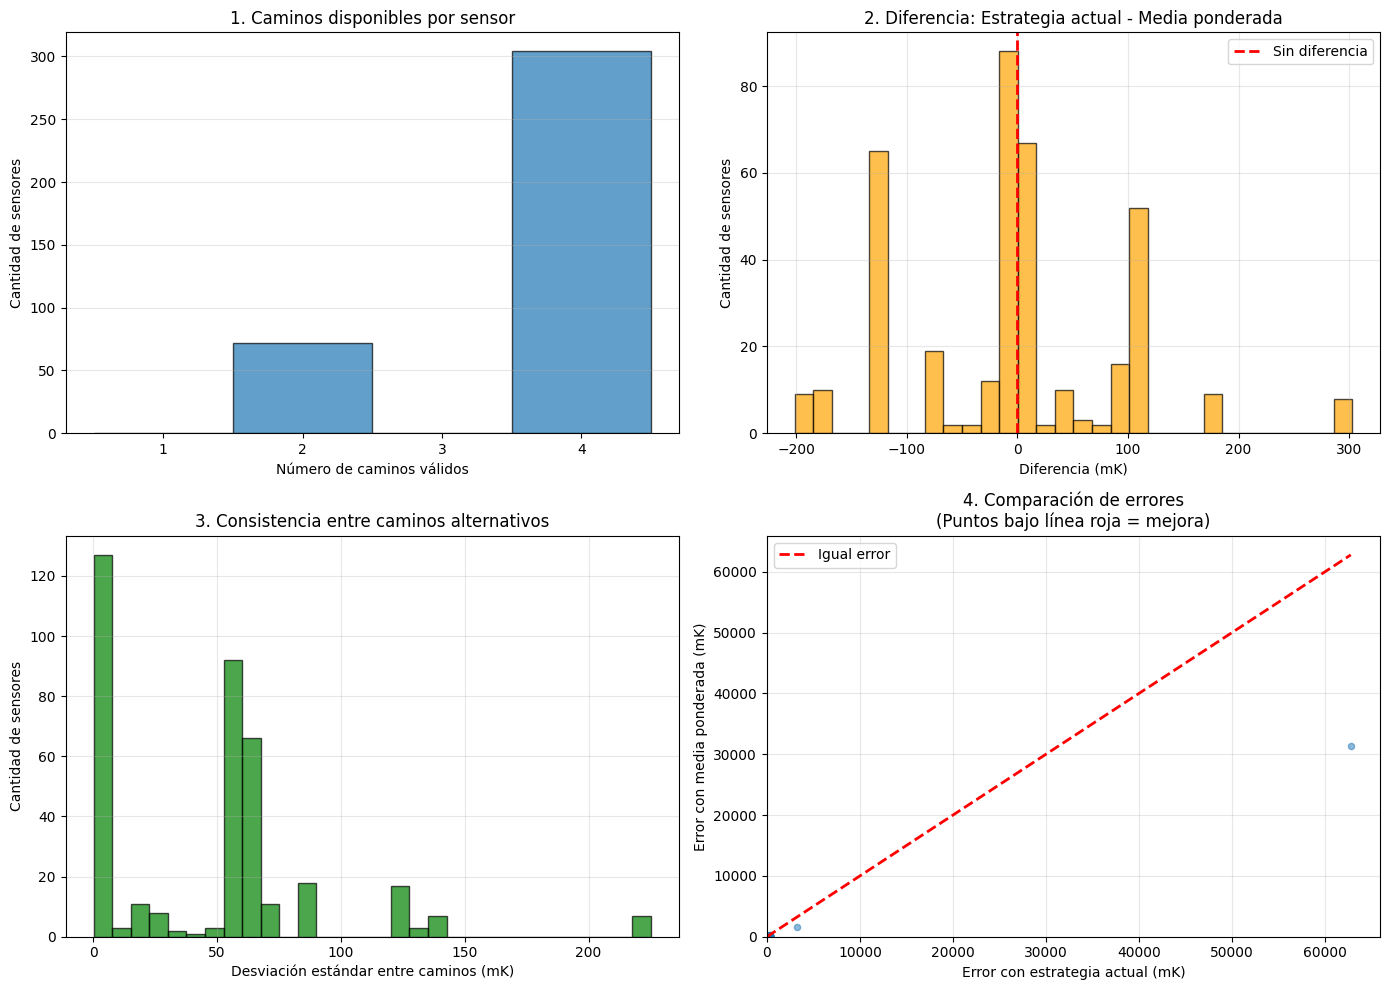


=== Resumen ===
La media ponderada reduce el error en: 376/376 sensores
Reducción promedio: 176.963 mK


In [12]:
# Visualización de resultados multi-camino
import matplotlib.pyplot as plt

calculated_multi = df_multi[df_multi['Status'] == 'Calculado']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribución de caminos por sensor
n_caminos_vals = calculated_multi['N_Caminos'].values
axes[0, 0].hist(n_caminos_vals, bins=[0.5, 1.5, 2.5, 3.5, 4.5], edgecolor='black', alpha=0.7, align='mid')
axes[0, 0].set_xticks([1, 2, 3, 4])
axes[0, 0].set_xlabel('Número de caminos válidos')
axes[0, 0].set_ylabel('Cantidad de sensores')
axes[0, 0].set_title('1. Caminos disponibles por sensor')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# 2. Diferencia entre estrategias
diff_media = calculated_multi['Constante_Primer_Camino_K'] - calculated_multi['Constante_Media_Ponderada_K']
axes[0, 1].hist(diff_media * 1000, bins=30, edgecolor='black', color='orange', alpha=0.7)
axes[0, 1].set_xlabel('Diferencia (mK)')
axes[0, 1].set_ylabel('Cantidad de sensores')
axes[0, 1].set_title('2. Diferencia: Estrategia actual - Media ponderada')
axes[0, 1].axvline(0, color='red', linestyle='--', linewidth=2, label='Sin diferencia')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Consistencia entre caminos
axes[1, 0].hist(calculated_multi['Std_Entre_Caminos_K'] * 1000, bins=30, edgecolor='black', color='green', alpha=0.7)
axes[1, 0].set_xlabel('Desviación estándar entre caminos (mK)')
axes[1, 0].set_ylabel('Cantidad de sensores')
axes[1, 0].set_title('3. Consistencia entre caminos alternativos')
axes[1, 0].grid(True, alpha=0.3)

# 4. Comparación de errores (ajustar rango para ver datos)
error_actual = calculated_multi['Error_Primer_Camino_K'] * 1000
error_ponderado = calculated_multi['Error_Media_Ponderada_K'] * 1000

# Determinar rango dinámico
max_val = max(error_actual.max(), error_ponderado.max())
axes[1, 1].scatter(error_actual, error_ponderado, alpha=0.5, s=20)
axes[1, 1].plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='Igual error')
axes[1, 1].set_xlabel('Error con estrategia actual (mK)')
axes[1, 1].set_ylabel('Error con media ponderada (mK)')
axes[1, 1].set_title('4. Comparación de errores\n(Puntos bajo línea roja = mejora)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim([0, max_val * 1.05])
axes[1, 1].set_ylim([0, max_val * 1.05])

plt.tight_layout()
plt.show()

# Resumen
mejora_error = (calculated_multi['Error_Media_Ponderada_K'] < calculated_multi['Error_Primer_Camino_K']).sum()
print(f"\n=== Resumen ===")
print(f"La media ponderada reduce el error en: {mejora_error}/{len(calculated_multi)} sensores")
print(f"Reducción promedio: {(calculated_multi['Error_Primer_Camino_K'] - calculated_multi['Error_Media_Ponderada_K']).mean() * 1000:.3f} mK")

### 5.7 Comparación visual de las 3 estrategias

Distribución de constantes y errores para cada método de cálculo.

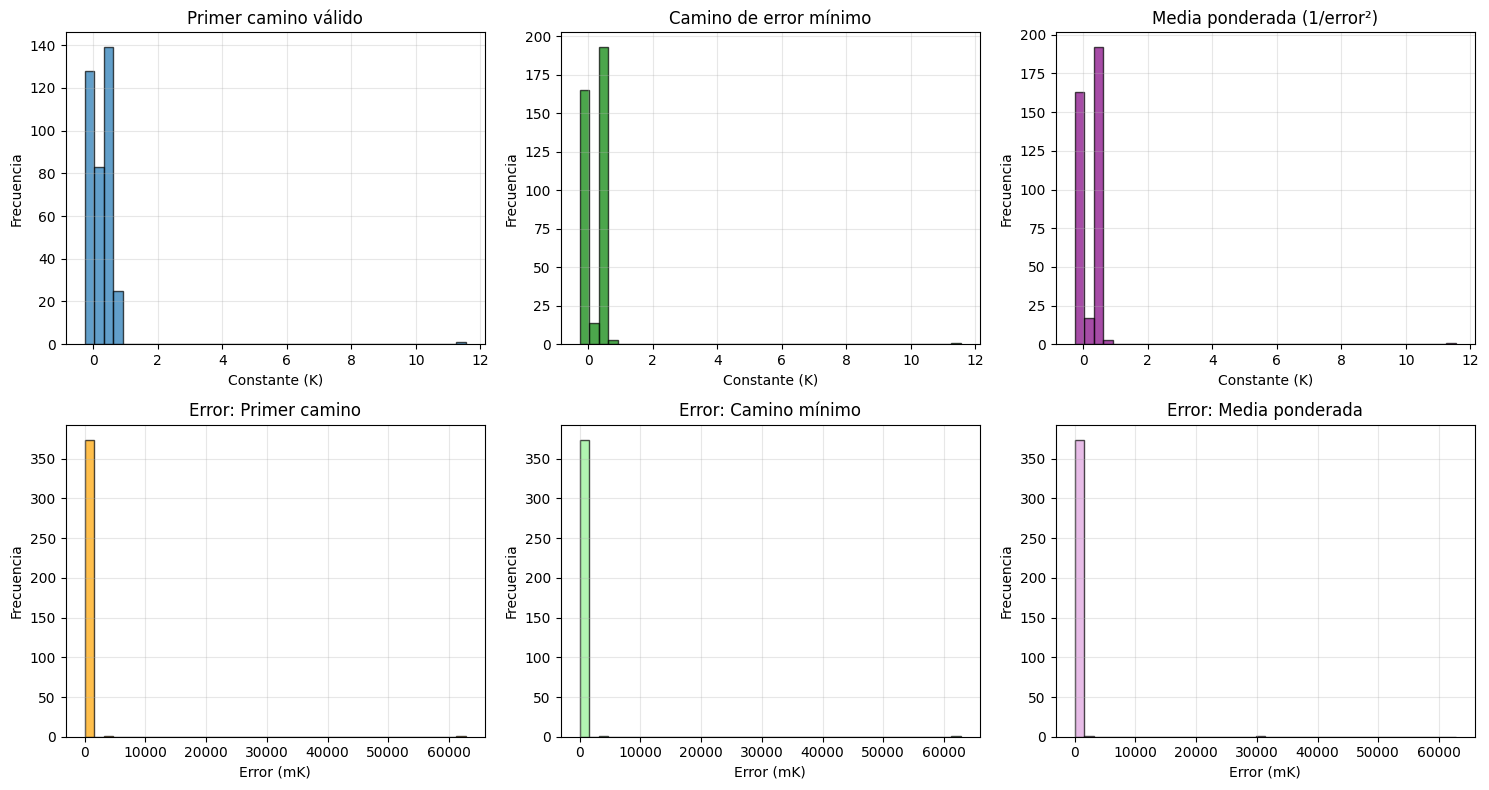


=== Comparación de estrategias ===

1. PRIMER CAMINO VÁLIDO (estrategia en calibration_constants_notebook.csv):
   Error medio: 279.751 mK
   Error std: 3236.622 mK

2. CAMINO DE ERROR MÍNIMO:
   Error medio: 195.751 mK
   Error std: 3239.994 mK
   Mejora vs actual: 84.000 mK

3. MEDIA PONDERADA (recomendado):
   Error medio: 102.788 mK
   Error std: 1619.920 mK
   Mejora vs actual: 176.963 mK


In [13]:
# Comparación visual de las 3 estrategias
import matplotlib.pyplot as plt

calculated_multi = df_multi[df_multi['Status'] == 'Calculado']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Calcular rangos comunes para constantes (fila 1)
const_min = min(calculated_multi['Constante_Primer_Camino_K'].min(),
                calculated_multi['Constante_Min_Error_K'].min(),
                calculated_multi['Constante_Media_Ponderada_K'].min())
const_max = max(calculated_multi['Constante_Primer_Camino_K'].max(),
                calculated_multi['Constante_Min_Error_K'].max(),
                calculated_multi['Constante_Media_Ponderada_K'].max())
const_bins = 40

# Fila 1: Distribución de constantes de calibración (con mismo rango)
axes[0, 0].hist(calculated_multi['Constante_Primer_Camino_K'], bins=const_bins, 
                range=(const_min, const_max), edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Constante (K)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Primer camino válido')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(calculated_multi['Constante_Min_Error_K'], bins=const_bins,
                range=(const_min, const_max), edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_xlabel('Constante (K)')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Camino de error mínimo')
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].hist(calculated_multi['Constante_Media_Ponderada_K'], bins=const_bins,
                range=(const_min, const_max), edgecolor='black', alpha=0.7, color='purple')
axes[0, 2].set_xlabel('Constante (K)')
axes[0, 2].set_ylabel('Frecuencia')
axes[0, 2].set_title('Media ponderada (1/error²)')
axes[0, 2].grid(True, alpha=0.3)

# Calcular rangos comunes para errores (fila 2, en mK)
error_min = min((calculated_multi['Error_Primer_Camino_K'] * 1000).min(),
                (calculated_multi['Error_Min_K'] * 1000).min(),
                (calculated_multi['Error_Media_Ponderada_K'] * 1000).min())
error_max = max((calculated_multi['Error_Primer_Camino_K'] * 1000).max(),
                (calculated_multi['Error_Min_K'] * 1000).max(),
                (calculated_multi['Error_Media_Ponderada_K'] * 1000).max())
error_bins = 40

# Fila 2: Distribución de errores (en mK, con mismo rango)
axes[1, 0].hist(calculated_multi['Error_Primer_Camino_K'] * 1000, bins=error_bins,
                range=(error_min, error_max), edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_xlabel('Error (mK)')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Error: Primer camino')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(calculated_multi['Error_Min_K'] * 1000, bins=error_bins,
                range=(error_min, error_max), edgecolor='black', alpha=0.7, color='lightgreen')
axes[1, 1].set_xlabel('Error (mK)')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Error: Camino mínimo')
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].hist(calculated_multi['Error_Media_Ponderada_K'] * 1000, bins=error_bins,
                range=(error_min, error_max), edgecolor='black', alpha=0.7, color='plum')
axes[1, 2].set_xlabel('Error (mK)')
axes[1, 2].set_ylabel('Frecuencia')
axes[1, 2].set_title('Error: Media ponderada')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas comparativas
print(f"\n=== Comparación de estrategias ===")
print(f"\n1. PRIMER CAMINO VÁLIDO (estrategia en calibration_constants_notebook.csv):")
print(f"   Error medio: {calculated_multi['Error_Primer_Camino_K'].mean() * 1000:.3f} mK")
print(f"   Error std: {calculated_multi['Error_Primer_Camino_K'].std() * 1000:.3f} mK")

print(f"\n2. CAMINO DE ERROR MÍNIMO:")
print(f"   Error medio: {calculated_multi['Error_Min_K'].mean() * 1000:.3f} mK")
print(f"   Error std: {calculated_multi['Error_Min_K'].std() * 1000:.3f} mK")
print(f"   Mejora vs actual: {(calculated_multi['Error_Primer_Camino_K'].mean() - calculated_multi['Error_Min_K'].mean()) * 1000:.3f} mK")

print(f"\n3. MEDIA PONDERADA (recomendado):")
print(f"   Error medio: {calculated_multi['Error_Media_Ponderada_K'].mean() * 1000:.3f} mK")
print(f"   Error std: {calculated_multi['Error_Media_Ponderada_K'].std() * 1000:.3f} mK")
print(f"   Mejora vs actual: {(calculated_multi['Error_Primer_Camino_K'].mean() - calculated_multi['Error_Media_Ponderada_K'].mean()) * 1000:.3f} mK")